- Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

- Import Data

In [150]:
df = pd.read_csv('Unicorn_Companies.csv')

Get a Glimpse in Data

In [47]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [48]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [49]:
df.shape

(1074, 10)

In [50]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

- Data Cleaning

Remove Spaces and Special Charchters

In [151]:
df['Funding'] = df['Funding'].str.replace('$','')
df['Funding'] = df['Funding'].str.replace('B','000000000')
df['Funding'] = df['Funding'].str.replace('M','000000')
df['Funding'] = df['Funding'].str.replace('Unknown','0')

C:\Users\AS\AppData\Local\Temp\ipykernel_7732\2288298414.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].str.replace('$','')


In [153]:
df['Valuation'] = df['Valuation'].str.replace('$','')
df['Valuation'] = df['Valuation'].str.replace('B','000000000')
df['Valuation'] = df['Valuation'].str.replace('M','000000')

C:\Users\AS\AppData\Local\Temp\ipykernel_7732\1105011963.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = df['Valuation'].str.replace('$','')


Change Data Types to The Correct Form

In [154]:
df['Funding'] = pd.to_numeric(df['Funding'])

In [155]:
df['Valuation'] = pd.to_numeric(df['Valuation'])

In [156]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [157]:
df['Year Founded'] = df['Year Founded'].astype('O')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   int64         
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   object        
 8   Funding           1074 non-null   int64         
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 84.0+ KB


Check and Deal with Missing Values

In [52]:
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [159]:
df['City'].fillna(method='ffill',inplace=True)

In [160]:
df['Select Investors'].fillna(method='bfill',inplace=True)

In [82]:
df.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

Check Duplictes

In [53]:
df.duplicated().sum()

0

- Explority Data Analysis (EDA)

In [106]:
df.sample(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
262,Games24x7,3000000000,2022-03-30,Internet software & services,Mumbai,India,Asia,2006,75000000,"Tiger Global Management, The Raine Group, Mala..."
780,Oda,1000000000,2021-06-02,E-commerce & direct-to-consumer,Oslo,Norway,Europe,2013,337000000,"Kinnevik, Softbank Group, Prosus Ventures"
325,Amber Group,3000000000,2021-06-21,Fintech,Glendale,Hong Kong,Asia,2015,328000000,"Tiger Global Management, Tiger Brokers, DCM Ve..."
243,OpenAI,3000000000,2019-07-22,Artificial intelligence,San Francisco,United States,North America,2015,1000000000,Khosla Ventures
10,Revolut,33000000000,2018-04-26,Fintech,London,United Kingdom,Europe,2015,2000000000,"index Ventures, DST Global, Ribbit Capital"
537,Rokt,2000000000,2021-12-16,Internet software & services,New York,United States,North America,2012,487000000,"Square Peg Capital, TDM Growth Partners, Tiger..."
946,JoyTunes,1000000000,2021-06-21,Edtech,Tel Aviv,Israel,Asia,2011,92000000,"Genesis Partners, Aleph, Insight Partners"
145,Pleo,5000000000,2021-07-06,Fintech,Copenhagen,Denmark,Europe,2015,428000000,"Creandum, Founders, Kinnevik"
261,Fetch Rewards,3000000000,2021-03-31,E-commerce & direct-to-consumer,Madison,United States,North America,2014,582000000,"Greycroft, Loeb.NYC, DST Global"
349,Sky Mavis,3000000000,2021-10-04,Internet software & services,Ho Chi Minh City,Vietnam,Asia,2019,311000000,"Fabric Ventures, 500 Global, Standard Crypto"


In [108]:
df.describe().round(1)

,Valuation,Funding
count,1.074000e+03,1.074000e+03
mean,3.455307e+09,5.510428e+08
std,8.547022e+09,8.077194e+08
min,1.000000e+09,0.000000e+00
25%,1.000000e+09,2.180000e+08
50%,2.000000e+09,3.650000e+08
75%,3.000000e+09,6.030000e+08
max,1.800000e+11,1.400000e+10


In [162]:
df['Industry'].value_counts().sort_values(ascending=False)

Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: Industry, dtype: int64

<AxesSubplot: title={'center': 'Top 5 Industries'}>

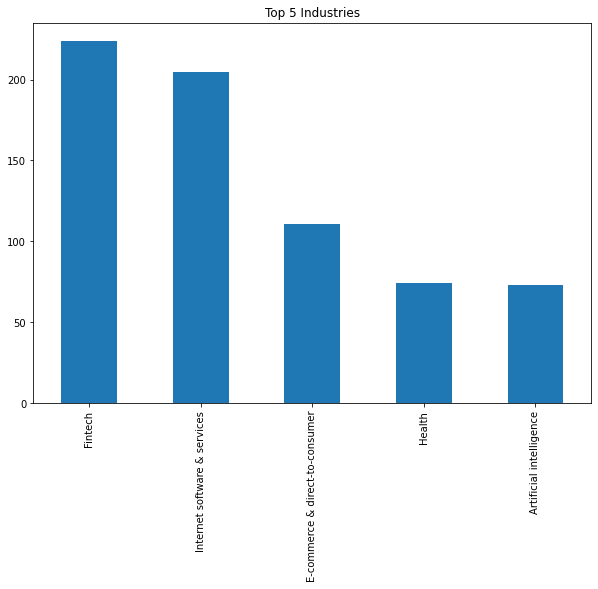

In [168]:
df['Industry'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(10,7),title='Top 5 Industries')

<AxesSubplot: title={'center': 'Buttom 5 Industries'}>

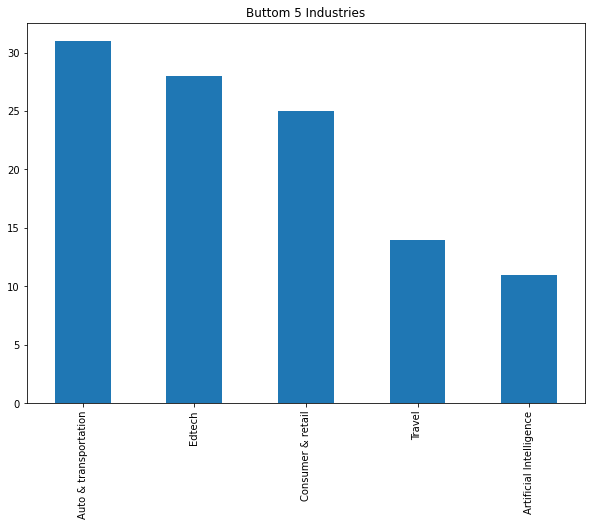

In [169]:
df['Industry'].value_counts().sort_values(ascending=False).tail(5).plot(kind='bar',figsize=(10,7),title='Buttom 5 Industries')

In [172]:
df.groupby('Industry')['Funding'].max().sort_values(ascending=False)

Industry
Consumer & retail                      14000000000
Artificial intelligence                 8000000000
Other                                   7000000000
E-commerce & direct-to-consumer         5000000000
Hardware                                5000000000
Supply chain, logistics, & delivery     5000000000
Auto & transportation                   4000000000
Edtech                                  4000000000
Fintech                                 4000000000
Data management & analytics             3000000000
Travel                                  3000000000
Cybersecurity                           2000000000
Health                                  2000000000
Internet software & services            2000000000
Mobile & telecommunications             1000000000
Artificial Intelligence                  607000000
Name: Funding, dtype: int64

<AxesSubplot: title={'center': 'Top 5 Industries have Funding'}, xlabel='Funding $B', ylabel='Industry'>

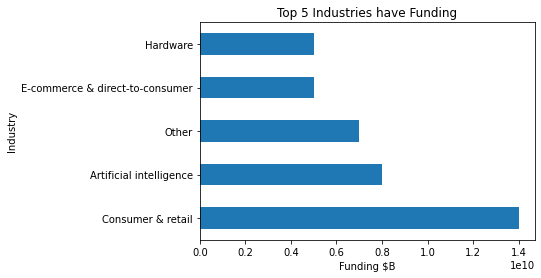

In [177]:
df.groupby('Industry')['Funding'].max().sort_values(ascending=False).head(5).plot(kind='barh',title='Top 5 Industries have Funding',xlabel='Funding $B',ylabel='Industry')

<AxesSubplot: title={'center': 'Buttom 5 Industries have Funding'}, xlabel='Funding $B', ylabel='Industry'>

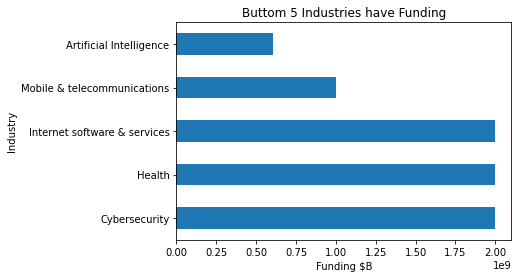

In [178]:
df.groupby('Industry')['Funding'].max().sort_values(ascending=False).tail(5).plot(kind='barh',title='Buttom 5 Industries have Funding',xlabel='Funding $B',ylabel='Industry')

In [185]:
df.pivot_table(index='Industry',values='Valuation',aggfunc=np.max).sort_values(by='Valuation',ascending=False)

,Valuation
Industry,
Artificial intelligence,180000000000
E-commerce & direct-to-consumer,100000000000
Other,100000000000
Fintech,95000000000
Internet software & services,40000000000
"Supply chain, logistics, & delivery",39000000000
Consumer & retail,38000000000
Data management & analytics,38000000000
Edtech,22000000000


In [187]:
df.Company.value_counts()

Bolt               2
Bytedance          1
Yidian Zixun       1
Klook              1
Epirus             1
                  ..
eDaili             1
ENOVATE            1
Fenbi Education    1
Hesai Tech         1
Zwift              1
Name: Company, Length: 1073, dtype: int64

In [188]:
df.loc[df['Company'] == 'Bolt']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
40,Bolt,11000000000,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,1000000000,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,11000000000,2021-10-08,Fintech,San Francisco,United States,North America,2014,1000000000,"Activant Capital, Tribe Capital, General Atlantic"


<AxesSubplot: title={'center': 'Funding Per Continent'}, ylabel='Funding'>

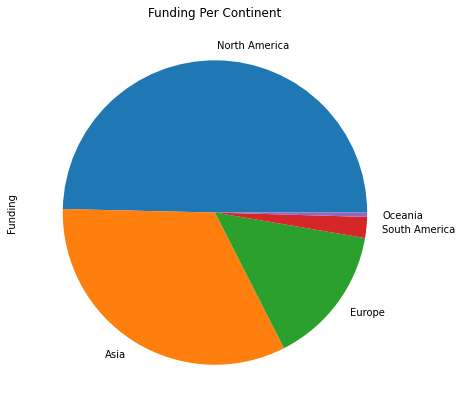

In [13]:
df.groupby('Continent')['Funding'].sum().sort_values(ascending=False).head(5).plot(kind='pie',figsize=(7,7),title='Funding Per Continent')

<AxesSubplot: title={'center': 'Top 5 Countries Per Funding'}, xlabel='Country', ylabel='Funding B$'>

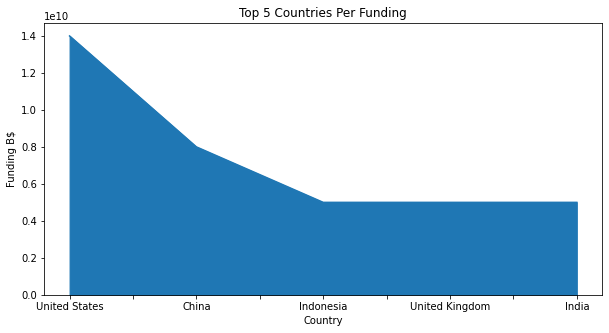

In [11]:
df.groupby('Country').max()['Funding'].sort_values(ascending=False).head(5).plot(kind='area',figsize=(10,5),ylabel='Funding B$',xlabel='Country',title='Top 5 Countries Per Funding')

<AxesSubplot: title={'center': 'Buttom 5 Countries Per Funding'}, xlabel='Country', ylabel='Funding B$'>

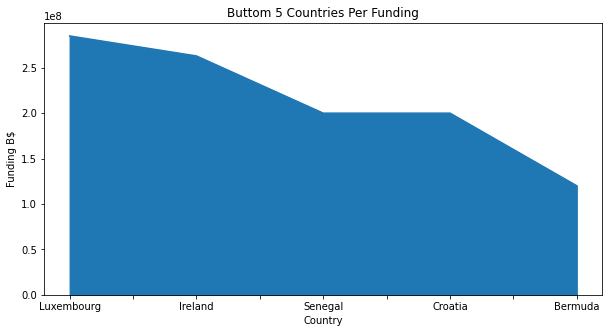

In [12]:
df.groupby('Country').max()['Funding'].sort_values(ascending=False).tail(5).plot(kind='area',figsize=(10,5),ylabel='Funding B$',xlabel='Country',title='Buttom 5 Countries Per Funding')

<AxesSubplot: title={'center': 'Avg Valuation for Every Year'}, xlabel='Date Joined'>

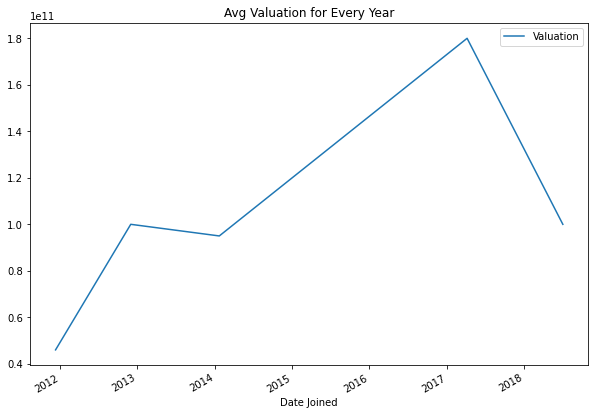

In [23]:
df.pivot_table(index='Date Joined',values='Valuation',aggfunc=np.mean).sort_values(by='Valuation',ascending=False).head(5).plot(kind='line',title='Avg Valuation for Every Year',figsize=(10,7))

In [24]:
df['Select Investors'].value_counts()

Sequoia Capital                                                3
Pelion Venture Partners, Foundation Capital, Thoma Bravo       2
Insight Partners, Sequoia Capital, Index Ventures              2
Speedinvest, Valar Ventures, Uniqa Ventures                    2
Sequoia Capital India, The Times Group, GMO VenturePartners    2
                                                              ..
Trustbridge Partners, IDG Capital, Sequoia Capital China       1
K2VC, Lightspeed China Partners, Sky9 Capital                  1
Automobile Industry Guidance Fund                              1
Trustbridge Partners, Hony Capital, IDG Capital                1
Novator Partners, True, Causeway Media Partners                1
Name: Select Investors, Length: 1058, dtype: int64

In [28]:
max_funding = df['Funding'].max()
df[df['Funding'] == max_funding]['Select Investors']

8    Tiger Global Management
Name: Select Investors, dtype: object

In [29]:
min_funding = df['Funding'].min()
df[df['Funding'] == min_funding]['Select Investors']

189                                          EQT Partners
215                                       Sequoia Capital
424     Rubicon Technology Partners, Max Ventures, Inc...
567                                            Blackstone
639                              China Prosperity Capital
651     NetEase Capital, Northern Light Venture Capita...
717                        Summit Partners, Qatar Holding
733     Insight Partners, Silversmith Capital Partners...
866     Advent International, PSG, Providence Equity P...
890                                          Bain Capital
945     Advent International, Bain Capital Ventures, S...
947          Berkshire Partners, Norwest Venture Partners
1002    DST Global, Sequoia Capital China, Gaorong Cap...
Name: Select Investors, dtype: object

C:\Users\AS\AppData\Local\Temp\ipykernel_10368\4171605317.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sn.stripplot(data=df[{'Funding' , 'Valuation'}])


<AxesSubplot: >

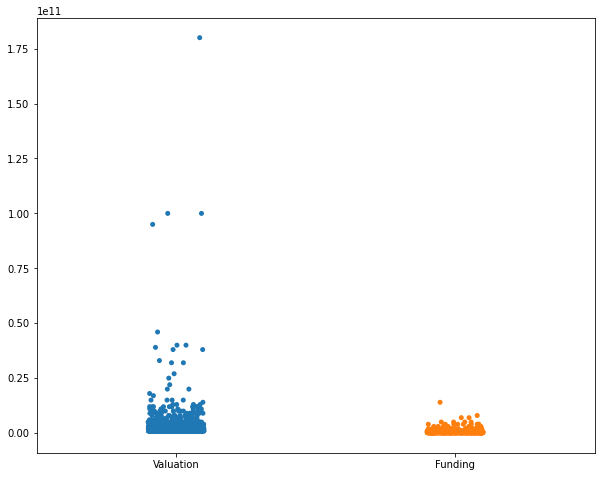

In [53]:
plt.figure(figsize=(10,8 ))
sn.stripplot(data=df[{'Funding' , 'Valuation'}])

<AxesSubplot: ylabel='Frequency'>

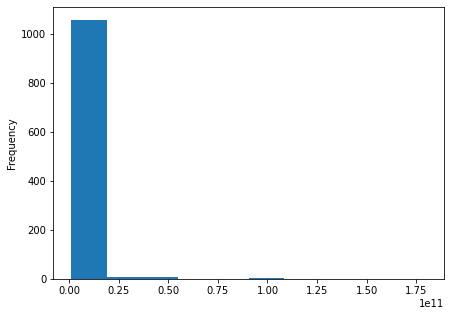

In [10]:
df['Valuation'].plot(kind='hist',figsize=(7,5))

<AxesSubplot: ylabel='Frequency'>

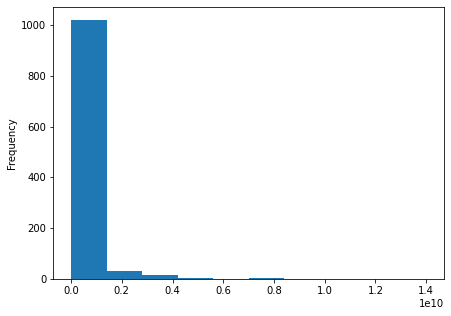

In [11]:
df['Funding'].plot(kind='hist',figsize=(7,5))

<AxesSubplot: xlabel='Year Founded', ylabel='Funding'>

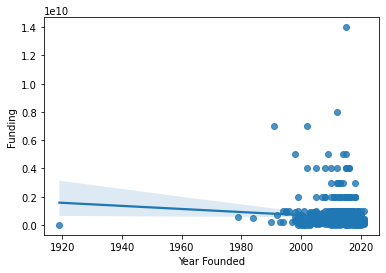

In [18]:
sn.regplot(data=df , x='Year Founded' , y='Funding')

<AxesSubplot: xlabel='Year Founded', ylabel='Valuation'>

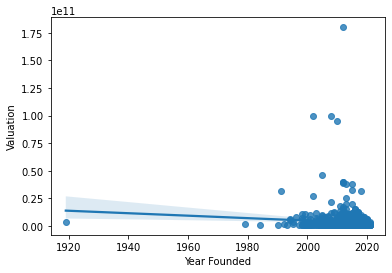

In [19]:
sn.regplot(data=df , x='Year Founded' , y='Valuation')

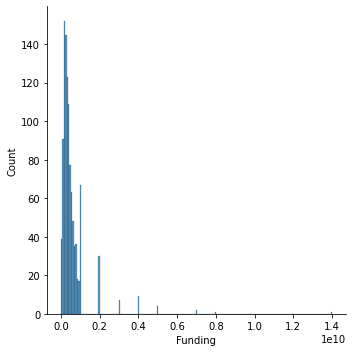

In [24]:
sn.displot(data=df ,x='Funding' )

<AxesSubplot: xlabel='Year Founded', ylabel='Funding'>

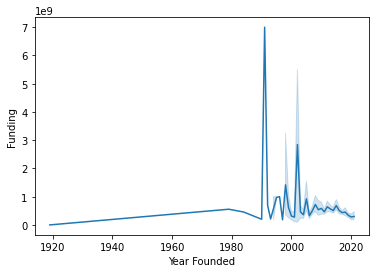

In [32]:
sn.lineplot(x = 'Year Founded' , y='Funding' ,data=df ,markers=True)

C:\Users\AS\AppData\Local\Temp\ipykernel_15160\2510342164.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sn.lineplot(x = 'Year Founded' , y='Valuation' ,data=df , hue='Continent', ci=False ,markers=True)


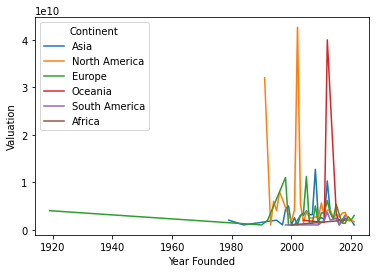

In [30]:
ax = sn.lineplot(x = 'Year Founded' , y='Valuation' ,data=df , hue='Continent', ci=False ,markers=True)